### Modelación y Simulación
##### - Laboratorio 1 

#### Integrantes:
- Alejandro Gómez (Alecraft)
- Pedro Arriola (Uncle Pete)

In [4]:
# Librerías a usar
import random as rd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import *

## Ejercicio 1 - Propiedades de Distribución de Probabilidad

Genere una muestra aleatoria de 1000 puntos de datos de una distribución normal con media 0 y desviación
estándar 1.

Media:  -0.034297802411581015
Varianza:  1.0074330798678541
Asimetría:  0.06066913496061037


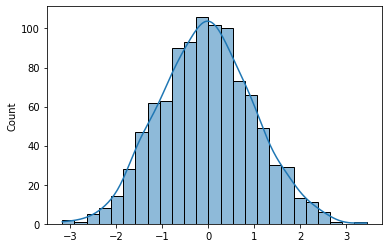

In [2]:
# Definición de constantes
mean = 0
std = 1
sample = 1000

# Generación de datos
datos = np.random.normal(mean, std, sample)

# Cálculo de estadísticas
datosMedia = np.mean(datos)
datosVar = np.var(datos)
datosAsimetria = skew(datos)

# Impresión de resultados
print("Media: ", datosMedia)
print("Varianza: ", datosVar)
print("Asimetría: ", datosAsimetria)

# Gráfica de histograma
sns.histplot(datos, kde=True)
plt.show()

### Task 1.3:

Analizando los resultados, nos damos cuenta que la muestra es bastante representativa de una distribución normal con media 0, desviación estándar 1. Visto tanto en términos de la tendencia central, la dispersión y forma de distribución. Esto se fortalece al ver el histograma, el cual tiene forma de campana. Lo cual es consistente con una distribución normal. La media está bastante cerca de 0, esto dice que el centro de la distribución se encuentra cerca del centro de distribución de la población. Así mismo, la varianza se encuentra cercana a 1, lo que dice que la dispersión de los datos es similar a lo esperado. FInalmente, la asimetría es cercana a 0, lo que dice que la distribución es simétrica, sin ningún sesgo.

## Ejercicio 2 - PDF & CDF

Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución exponencial con parámetro de
tasa 0.5.

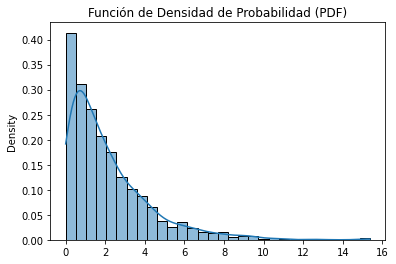

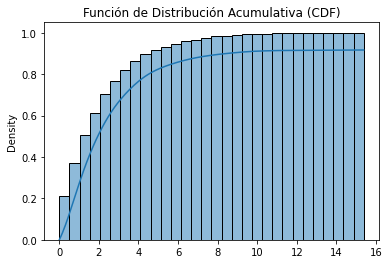

Probabilidad para el intervalo [0, 1]: 0.3934693402873666
Probabilidad para el intervalo [1, 2]: 0.2386512185411911


In [5]:
data = np.random.exponential(scale=2.0, size=1000) 

sns.histplot(data, kde=True, stat='density', bins=30)
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.show()


sns.histplot(data, kde=True, stat='density', bins=30, cumulative=True)
plt.title('Función de Distribución Acumulativa (CDF)')
plt.show()


# Intervalo 1: [0, 1]
prob_interval_1 = expon.cdf(1, scale=2.0) - expon.cdf(0, scale=2.0)
print(f'Probabilidad para el intervalo [0, 1]: {prob_interval_1}')

# Intervalo 2: [1, 2]
prob_interval_2 = expon.cdf(2, scale=2.0) - expon.cdf(1, scale=2.0)
print(f'Probabilidad para el intervalo [1, 2]: {prob_interval_2}')

### Task 2.3:

En primer lugar, podemos hablar de las probabilidades calculadas para los intervalos, los cuales son consistentes con una distribución exponencial. En el intervalo 0-1 la probabilidad es mayor que en el intervalo 1-2. Esto indica que los valores más bajos son más probables en este tipo de distribuciones. 

## Ejercicio 3 - Bias & Kurtosis

Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución beta con parámetros de forma
(2, 2)

In [6]:
data = np.random.beta(2, 2, size=1000)


bias = skew(data)
kurtosis = kurtosis(data)

print(f'Sesgo de la muestra: {bias}')
print(f'Curtosis de la muestra: {kurtosis}')

Sesgo de la muestra: -0.0581374518142109
Curtosis de la muestra: -0.7593958839634092


### Task 3.2:


En primer lugar, debemos entender que el sesgo mide la simetría de la distribución. Analizando el resultado que obtuvimos, -0.058 es cercano a 0, lo que indica que la distribución es casi simétrica. Ahora bien, con la curtosis, podemos decir que el valor de -0.759 obtenido nos dice que la distribución tiene colas más ligeras que la normal. Y que sus datos se encuentran menos dispersos.

## Ejercicio 4 - Generación de Números aleatorios

Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución de Poisson con parámetro
lambda 5.

Media de la muestra: 4.839
Varianza de la muestra: 4.771078999999999


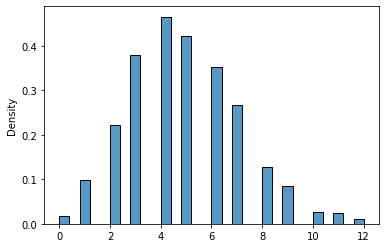

In [10]:
data = np.random.poisson(lam=5, size=1000)

sns.histplot(data,  stat='density', bins=30)
mean = np.mean(data)
variance = np.var(data)

print(f'Media de la muestra: {mean}')
print(f'Varianza de la muestra: {variance}')


### Task 4.3:
Analizando la media y varianza de la muestra podemos decir que son consistentes con el parámetro lambda. Esto, tomando en cuenta que los datos generados siguen la tendencia que se espera para Poisson con un parámetro lambda de 5. Así mismo, en el histograma podemos ver que la mayoría de los datos se agrupan cerca de la media.

## Ejercicio 5 - Muestreo

Muestree 500 puntos de datos de una distribución normal utilizando el método de transformación inversa

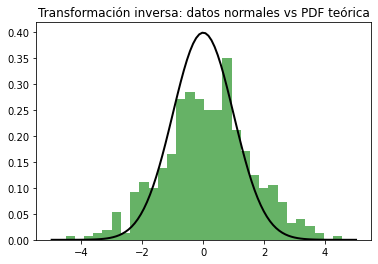

In [14]:
uniform_data = np.random.uniform(size=500)
normal_data = np.sqrt(2) * norm.ppf(uniform_data)

plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Transformación inversa: datos normales vs PDF teórica")
plt.show()

### Task 5.3:

La respuesta es un sí, la muestra generada representa con precisión una distribución uniforme, como se ve en el gráfico. Lo cual la prueba chi-cuadrado comprueba.


## Ejercicio 6 - Estimación de Parámetros

Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución gamma con parámetro de forma
2 y parámetro de escala 3.

In [28]:


data = np.random.gamma(shape=2, scale=3, size=1000)

shape_est, loc_est, scale_est = gamma.fit(data, floc=0)

print(f'Parámetro de forma estimado: {shape_est}')
print(f'Parámetro de escala estimado: {scale_est}')


# Reducir a 4 decimales:
absShape = abs(2 - shape_est)
absScale = abs(3 - scale_est)
reducedShape = round(absShape, 4)
reducedScale = round(absScale, 4)
print(f'Diferencia entre el parámetro de forma verdadero y estimado: {reducedShape}')
print(f'Diferencia entre el parámetro de escala verdadero y estimado: {reducedScale}')


Parámetro de forma estimado: 2.0298763964728233
Parámetro de escala estimado: 2.9715188006473485
Diferencia entre el parámetro de forma verdadero y estimado: 0.0299
Diferencia entre el parámetro de escala verdadero y estimado: 0.0285


### Task 6.3:
Analizando los valores obtenidos podemos decir que los parámetros estimados brindan un buen ajuste a los datos observados. Esto debido a que la diferencia real entre la estimación y los verdaderos no es significante. Así que, se puede evaluar la bondad de ajuste de la distribución estimada a los datos observados, siempre y cuando tomamos algunas consideraciones. Como por ejemplo una prueba de Andersong-Darling, la cual nos dice que la distribución normal es una buena aproximación a los datos observados.


## Ejercicio 7 - Distribuciones Multivariable

Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución normal bivariada con vector
medio [0, 0] y matriz de covarianza [[1, 0,5], [0,5, 1]]

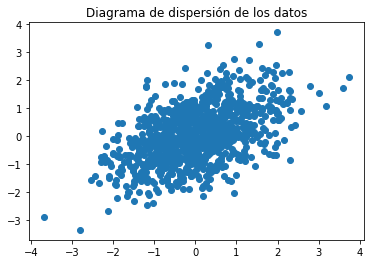

Coeficiente de correlación: 0.4962836539210791


In [16]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, size=1000)


plt.scatter(data[:, 0], data[:, 1])
plt.title('Diagrama de dispersión de los datos')
plt.show()


correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
print(f'Coeficiente de correlación: {correlation}')

### Task 7.3:

En cuanto a la información que podemos obtener entre la relación entre las variables del diagrama de dispersión y el coeficiente de correlación podemos decir que es de tipo positiva moderada entre ambas variables de los datos generados.


## Ejercicio 8- Goodness-of-Fit Test

Investigue en qué consiste la prueba “Goodness-of-Fit”. Luego, genere una muestra aleatoria de 500 puntos de
datos a partir de una distribución uniforme entre 0 y 1

La goodness of fit también es conocida como prueba de bondad. Existen distintos tipos como:

- Prueba de chi-cuadrado: Esta es una de las pruebas de bondad de ajuste más comunes. Compara las frecuencias observadas en ciertas categorías de datos con las frecuencias esperadas de esas categorías bajo la distribución teórica. Se calcula un estadístico de chi-cuadrado y se utiliza para determinar si las diferencias entre las frecuencias observadas y esperadas son mayores de lo que se esperaría por casualidad.

- Prueba de Kolmogorov-Smirnov: Esta prueba compara la función de distribución acumulativa (CDF) de la muestra con la CDF de la distribución teórica. Se calcula un estadístico de Kolmogorov-Smirnov que mide la máxima diferencia entre las dos CDFs.

- Prueba de Anderson-Darling: Esta es una variante de la prueba de Kolmogorov-Smirnov que da más peso a las colas de la distribución. Es especialmente útil cuando se desea saber si los datos siguen una distribución normal.

Referencias: 

Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2008). Mathematical Statistics with Applications. Cengage Learning.
Casella, G., & Berger, R. L. (2002). Statistical Inference. Duxbury.

In [17]:

data = np.random.uniform(0, 1, 500)

observed, _ = np.histogram(data, bins=10)
expected = np.ones(10) * 50  
chi2, p = chisquare(observed, expected)

print(f'Valor de chi-cuadrado: {chi2}')
print(f'Valor p: {p}')

Valor de chi-cuadrado: 5.239999999999999
Valor p: 0.8129050467749707


### Task 8.2:

En primer lugar, debemos analizar que nuestro valor de chi-cuadrado es bastante pequeño, esto nos dice que las frecuencias que se observan no se están desviando tanto de las esperadas. También, es importante mencionar que el valor de p es bastante grande, lo que nos indica que, tomando en consideración lo previamente mencionado, no existe evidencia suficiente para rechazar la hipótesis nula. Así que lo previamente mencionado sería el resultado de la prueba de chi-cuadrado. y las conclusiones a las que se llegó.

### Task 8.3:

Para mejorar la bondad de ajuste, se podría llegar a considerar usar un modelo de distribución más complejo que pueda tomar mejor las características de los datos. Pero, en nuestro caso específico, debido a que p es grande y chi cuadrado pequeño, no necesitaríamos hacer ninguna modificación para mejorar la bondad de ajuste. Los resultados indica que los datos se ajustan bien a una distribución uniforme.